# Mandelbrot

## Vectorized mandelbrot set

Mandelbrot code inspired from [NumPy: Compute Mandelbrot set by Vectorization](https://www.learnpythonwithrune.org/numpy-compute-mandelbrot-set-by-vectorization/), 
by @PythonWithRune

In [18]:
# mandelbrot vectorized function definition
import numpy as np
import matplotlib.pyplot as plt


def mandelbrot(height, width, x=-0.5, y=0, zoom=1, max_iterations=100):
    # To make navigation easier we calculate these values
    x_width = 1.5
    y_height = 1.5 * height / width
    x_from = x - x_width / zoom
    x_to = x + x_width / zoom
    y_from = y - y_height / zoom
    y_to = y + y_height / zoom
    # Here the actual algorithm starts
    x = np.linspace(x_from, x_to, width).reshape((1, width))
    y = np.linspace(y_from, y_to, height).reshape((height, 1))
    c = x + 1j * y
    # Initialize z to all zero
    z = np.zeros(c.shape, dtype=np.complex128)
    # To keep track in which iteration the point diverged
    div_time = np.zeros(z.shape, dtype=int)
    # To keep track on which points did not converge so far
    m = np.full(c.shape, True, dtype=bool)
    for i in range(max_iterations):
        z[m] = z[m] ** 2 + c[m]
        diverged = np.greater(np.abs(z), 2, out=np.full(c.shape, False), where=m)  # Find diverging
        div_time[diverged] = i  # set the value of the diverged iteration number
        # m[np.abs(z) > 2] = False    # to remember which have diverged
        m[diverged] = False
    return div_time

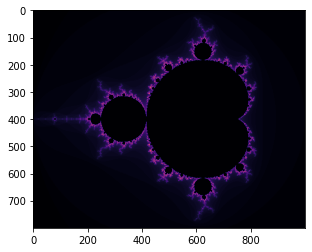

In [3]:
# Show plot of mandelbrot via matlplotlib
plt.imshow(mandelbrot(800, 1000), cmap="magma")
# The image below of Mandelbrot set
# plt.imshow(mandelbrot(800, 1000, -0.75, 0.0, 2, 200), cmap='magma')
# The image below of below of Mandelbrot set
# plt.imshow(mandelbrot(800, 1000, -1, 0.3, 20, 500), cmap='magma')
plt.show()

In [4]:
# Show mandelbrot with immvision
import imgui
import immvision.imgui_runner
import immvision

ax = plt.imshow(mandelbrot(800, 1000), cmap="magma")
immvision.imgui_runner.run(lambda: immvision.figure_display(ax.figure))

GlProviderSentinel __init__: calling immvision.InitGlProvider()


2022-05-04 00:57:56.805 Python[61703:5147502] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/hj/vlpl655s0gz58f0tfgghv0g40000gn/T/org.python.python.savedState


cpp: SetImGuiContextFrom_pyimgui_Context detected null context!
cpp: SetImGuiContextFrom_pyimgui_Context(0x7fce03ac3800) (got pointer from Python)
Python GenTexture()


In [3]:
# Perf mandelbrot vectorized
w, h = 800, 600
x = -0.5
y = 0.0
zoom = 1.0
max_iterations = 100

image = mandelbrot(h, w, x=x, y=y, zoom=zoom, max_iterations=max_iterations)
image.shape

NameError: name 'mandelbrot' is not defined

## Mandelbrot with Numba

In [1]:
# Try mandelbrot_numba standalone
from mandelbrot import MandelbrotParams
import numpy as np
from PIL import Image

params = MandelbrotParams()
mandel_image = params.mandelbrot_image()

# convert from float in [0, 1] to to uint8 in [0, 255] for PIL
mandel_image = np.clip(mandel_image * 255, 0, 255).astype(np.uint8)
mandel_image = Image.fromarray(mandel_image)
mandel_image.show()

In [1]:
# Create an imgui app for mandelbrot
from mandelbrot import MandelbrotApp

app = MandelbrotApp()

In [4]:
# Run the app
app.run()

pythonContextPointer differs from ImGui::GetCurrentContext()! The graphical app was perhaps restarted...
Python GenTexture()
Python GenTexture()
Python GenTexture()
Python GenTexture()
Python GenTexture()
Python GenTexture()
Python DeleteTexture()
Python DeleteTexture()
Python DeleteTexture()
Python DeleteTexture()
Python DeleteTexture()
Python DeleteTexture()


In [1]:
# test immvision
import cv2
import immvision
import immvision.imgui_runner

m = cv2.imread("/Users/pascal/dvp/OpenSource/ImGuiWork/immvision/pybind/pybind_examples/house.jpg")
p = immvision.ImageParams(image_display_size=(400, 0))


def gui2():

    immvision.image(m, p)


immvision.imgui_runner.run(gui2)

GlProviderSentinel __init__: calling immvision.InitGlProvider()


2022-05-04 02:30:06.886 Python[64211:5218432] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/hj/vlpl655s0gz58f0tfgghv0g40000gn/T/org.python.python.savedState


cpp: SetImGuiContextFrom_pyimgui_Context detected null context!
cpp: SetImGuiContextFrom_pyimgui_Context(0x7ff3eea05a00) (got pointer from Python)
Python GenTexture()
Python GenTexture()
Python GenTexture()
Python GenTexture()
Python GenTexture()
Python GenTexture()
